In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train = x_train.reshape((60000,28,28,1))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,28,28,1))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs = 10, batch_size = 64)

Epoch 1/10
938/938 [==============================] - 19s 20ms/step - loss: 0.1681 - accuracy: 0.9484
Epoch 2/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0467 - accuracy: 0.9857
Epoch 3/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 4/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 5/10
938/938 [==============================] - 20s 21ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 6/10
938/938 [==============================] - 22s 23ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0124 - accuracy: 0.9962
Epoch 8/10
938/938 [==============================] - 18s 20ms/step - loss: 0.0105 - accuracy: 0.9967
Epoch 9/10
938/938 [==============================] - 21s 22ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 10/10
938/938 [==============================] - 19s 20ms/step - loss: 0.007

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0384 - accuracy: 0.9925


[0.03840138018131256, 0.9925000071525574]

In [12]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [8]:
y_pred = model.predict(x_test)
matrix = cm(y_test.argmax(axis=1), y_pred.argmax(axis=1))

313/313 [==============================] - 1s 4ms/step


In [9]:
import seaborn as sns

In [15]:
print(cr(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [17]:
matrix

array([[ 974,    0,    2,    0,    0,    0,    0,    1,    3,    0],
       [   0, 1129,    0,    2,    0,    0,    0,    3,    1,    0],
       [   0,    0, 1025,    0,    0,    0,    0,    7,    0,    0],
       [   0,    0,    1, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  977,    0,    0,    0,    0,    5],
       [   1,    1,    0,    7,    0,  880,    2,    1,    0,    0],
       [   3,    3,    2,    1,    2,    1,  944,    0,    2,    0],
       [   0,    1,    0,    0,    0,    0,    0, 1025,    1,    1],
       [   0,    0,    1,    0,    0,    0,    0,    2,  970,    1],
       [   0,    1,    0,    0,    2,    2,    0,    7,    1,  996]],
      dtype=int64)

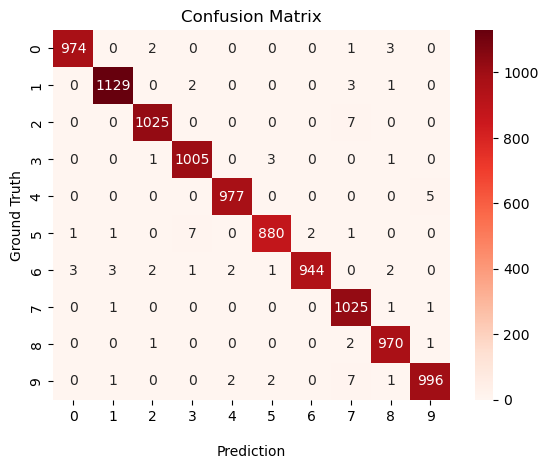

In [11]:
ax = sns.heatmap(matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');